In [609]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
# scipi is a library for statistical tests and visualizations 
from scipy import stats
from scipy.stats.mstats import winsorize
# random enables us to generate random numbers
import random
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [610]:
df = pd.read_csv('../data/df_cleaned.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,303236322,84,87,144,Minor,65,23,80,14,11,6
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,725980112,34,43,148,Minor,67,83,76,48,8,3
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,553634067,49,66,170,Minor,81,56,48,21,8,33
3,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,505671438,41,54,83,Minor,57,56,72,23,27,5
4,Flowers,Miley Cyrus,1,2023,1,12,12211,1316855716,300,745,118,Major,71,65,68,6,3,7


In [611]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
streams                  int64
in_apple_playlists       int64
in_deezer_playlists      int64
bpm                      int64
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [612]:
# collect data from unpopular songs dataset 
#create a new column for both popular and unpopular datasets called 'popularity'
#popular songs = '1'
#unpopular songs = '0'

#combine the two tables together 
#see if there is any correlation using the heatmap 
#use "popularity" as the y 
    # X= df.drop(['popularity'],axis=1)
    # y=df['popularity']

In [613]:
df2 = pd.read_csv('unpopular_songs.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [614]:
#check for missing values
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0
mode,0,0.0
speechiness,0,0.0
acousticness,0,0.0
instrumentalness,0,0.0
liveness,0,0.0
valence,0,0.0


In [615]:
#check for missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
track_name,0,0.0
artist(s)_name,0,0.0
artist_count,0,0.0
released_year,0,0.0
released_month,0,0.0
released_day,0,0.0
in_spotify_playlists,0,0.0
streams,0,0.0
in_apple_playlists,0,0.0
in_deezer_playlists,0,0.0


In [616]:
#drop columns that will not be used 
df2.drop(['loudness', 'key', 'duration_ms', 'explicit', 'track_id'], axis=1, inplace=True)
df.drop(['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists'], axis=1, inplace=True)


In [617]:
df2.drop(['instrumentalness'], axis=1, inplace=True)

In [618]:
df2.columns

Index(['danceability', 'energy', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'popularity', 'track_name',
       'track_artist'],
      dtype='object')

In [619]:
df.columns

Index(['track_name', 'artist(s)_name', 'bpm', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

In [620]:
#change order of columns in df2 
df2 = df2[['track_name', 'track_artist', 'tempo', 'mode', 'danceability', 'valence', 'energy', 'acousticness', 'liveness', 'speechiness']]

#df2.head()

#change column names in df2
old_names = df2.columns
new_names = df.columns

for i in range(len(df2.columns)):
    df2 = df2.rename(columns={old_names[i]:new_names[i]})

#df.head()
#df2.head() 

In [621]:
#change decimal columns in df2 to percentages 
df2['danceability_%'] = df2['danceability_%'].apply(lambda x: x * 100)
df2['valence_%'] = df2['valence_%'].apply(lambda x: x * 100)
df2['energy_%'] = df2['energy_%'].apply(lambda x: x * 100)
df2['acousticness_%'] = df2['acousticness_%'].apply(lambda x: x * 100)
df2['liveness_%'] = df2['liveness_%'].apply(lambda x: x * 100)
df2['speechiness_%'] = df2['speechiness_%'].apply(lambda x: x * 100)

In [622]:
#change df dtypes from int64 to float64
df = df.astype({'danceability_%':'float64'})
df = df.astype({'valence_%':'float64'})
df = df.astype({'energy_%':'float64'})
df = df.astype({'acousticness_%':'float64'})
df = df.astype({'liveness_%':'float64'})
df = df.astype({'speechiness_%':'float64'})
df = df.astype({'bpm':'float64'})

In [623]:
df.drop(['mode'], axis=1, inplace=True)
df2.drop(['mode'], axis=1, inplace=True)

In [624]:
#add 'popularity' column to both datasets 
df['popularity'] = 'popular'
df2['popularity'] = 'unpopular'

In [625]:
#merge tables
df = pd.concat([df, df2])
df.sample(20)

,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%,popularity
860,"CHAMBER OF DESPAIR, PT. II",Dr S,149.962,56.1,46.00,56.10,0.298,10.70,3.44,unpopular
680,Soul Crypt,Last Bronzeman,171.050,50.1,64.90,75.50,28.300,9.53,32.40,unpopular
807,Deep Relaxation,Zen Path,68.065,11.9,3.55,4.49,89.600,8.71,3.92,unpopular
1050,Back on the Island,Sound Frames,134.004,53.6,29.50,35.60,8.190,12.30,2.73,unpopular
4010,One Foot One Knee,Ian Steinberg,75.636,59.0,18.50,19.40,92.200,9.74,3.02,unpopular
844,Nuff being said,Co Staccs,126.938,70.9,3.61,47.40,1.550,13.00,39.70,unpopular
3116,Nature Sounds for Relaxation,Sonido Del Bosque y Naturaleza,121.898,24.8,7.02,66.60,51.800,42.40,8.86,unpopular
147,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,93.000,63.0,21.00,52.00,28.000,9.00,3.00,popular
45,PRC,"Natanael Cano, Peso Pluma",138.000,78.0,89.00,83.00,10.000,12.00,5.00,popular
1982,Sugar - Paper Faces Remix,Armand Van Helden,132.013,63.2,86.50,66.80,0.424,29.70,5.51,unpopular


In [626]:
#make some columns categorical (Ex: BPM, danceability, valence, energy, acousticness, liveness, speechiness)

df.loc[(df["bpm"] >= 100) & (df["bpm"] <= 110), "bpm"] = 110
df.loc[(df["bpm"] >= 111) & (df["bpm"] <= 120), "bpm"] = 120
df.loc[(df["bpm"] >= 121) & (df["bpm"] <= 130), "bpm"] = 130
df.loc[(df["bpm"] >= 131) & (df["bpm"] <= 140), "bpm"] = 140
df.loc[(df["bpm"] >= 141) & (df["bpm"] <= 150), "bpm"] = 150
df.loc[(df["bpm"] >= 151) & (df["bpm"] <= 160), "bpm"] = 160
df.loc[(df["bpm"] >= 161) & (df["bpm"] <= 170), "bpm"] = 170
df.loc[(df["bpm"] >= 171) & (df["bpm"] <= 180), "bpm"] = 180
df.loc[(df["bpm"] >= 181) & (df["bpm"] <= 190), "bpm"] = 190
df.loc[(df["bpm"] >= 191) & (df["bpm"] <= 200), "bpm"] = 200
df.loc[(df["bpm"] >= 201) & (df["bpm"] <= 210), "bpm"] = 210
df.loc[(df["bpm"] >= 211) & (df["bpm"] <= 220), "bpm"] = 220

df.head()
        

,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%,popularity
0,WHERE SHE GOES,Bad Bunny,150.0,65.0,23.0,80.0,14.0,11.0,6.0,popular
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",150.0,67.0,83.0,76.0,48.0,8.0,3.0,popular
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",170.0,81.0,56.0,48.0,21.0,8.0,33.0,popular
3,un x100to,"Bad Bunny, Grupo Frontera",83.0,57.0,56.0,72.0,23.0,27.0,5.0,popular
4,Flowers,Miley Cyrus,120.0,71.0,65.0,68.0,6.0,3.0,7.0,popular


In [627]:
df.loc[(df["danceability_%"] >= 0) & (df["danceability_%"] <= 10), "danceability_%"] = 10
df.loc[(df["danceability_%"] >= 11) & (df["danceability_%"] <= 20), "danceability_%"] = 20
df.loc[(df["danceability_%"] >= 21) & (df["danceability_%"] <= 30), "danceability_%"] = 30
df.loc[(df["danceability_%"] >= 31) & (df["danceability_%"] <= 40), "danceability_%"] = 40
df.loc[(df["danceability_%"] >= 41) & (df["danceability_%"] <= 50), "danceability_%"] = 50
df.loc[(df["danceability_%"] >= 51) & (df["danceability_%"] <= 60), "danceability_%"] = 60
df.loc[(df["danceability_%"] >= 61) & (df["danceability_%"] <= 70), "danceability_%"] = 70
df.loc[(df["danceability_%"] >= 71) & (df["danceability_%"] <= 80), "danceability_%"] = 80
df.loc[(df["danceability_%"] >= 81) & (df["danceability_%"] <= 90), "danceability_%"] = 90
df.loc[(df["danceability_%"] >= 91) & (df["danceability_%"] <= 100), "danceability_%"] = 100

In [628]:
df.loc[(df["valence_%"] >= 0) & (df["valence_%"] <= 10), "valence_%"] = 10
df.loc[(df["valence_%"] >= 11) & (df["valence_%"] <= 20), "valence_%"] = 20
df.loc[(df["valence_%"] >= 21) & (df["valence_%"] <= 30), "valence_%"] = 30
df.loc[(df["valence_%"] >= 31) & (df["valence_%"] <= 40), "valence_%"] = 40
df.loc[(df["valence_%"] >= 41) & (df["valence_%"] <= 50), "valence_%"] = 50
df.loc[(df["valence_%"] >= 51) & (df["valence_%"] <= 60), "valence_%"] = 60
df.loc[(df["valence_%"] >= 61) & (df["valence_%"] <= 70), "valence_%"] = 70
df.loc[(df["valence_%"] >= 71) & (df["valence_%"] <= 80), "valence_%"] = 80
df.loc[(df["valence_%"] >= 81) & (df["valence_%"] <= 90), "valence_%"] = 90
df.loc[(df["valence_%"] >= 91) & (df["valence_%"] <= 100), "valence_%"] = 100

In [629]:
df.loc[(df["energy_%"] >= 0) & (df["energy_%"] <= 10), "energy_%"] = 10
df.loc[(df["energy_%"] >= 11) & (df["energy_%"] <= 20), "energy_%"] = 20
df.loc[(df["energy_%"] >= 21) & (df["energy_%"] <= 30), "energy_%"] = 30
df.loc[(df["energy_%"] >= 31) & (df["energy_%"] <= 40), "energy_%"] = 40
df.loc[(df["energy_%"] >= 41) & (df["energy_%"] <= 50), "energy_%"] = 50
df.loc[(df["energy_%"] >= 51) & (df["energy_%"] <= 60), "energy_%"] = 60
df.loc[(df["energy_%"] >= 61) & (df["energy_%"] <= 70), "energy_%"] = 70
df.loc[(df["energy_%"] >= 71) & (df["energy_%"] <= 80), "energy_%"] = 80
df.loc[(df["energy_%"] >= 81) & (df["energy_%"] <= 90), "energy_%"] = 90
df.loc[(df["energy_%"] >= 91) & (df["energy_%"] <= 100), "energy_%"] = 100

In [630]:
df.loc[(df["acousticness_%"] >= 0) & (df["acousticness_%"] <= 10), "acousticness_%"] = 10
df.loc[(df["acousticness_%"] >= 11) & (df["acousticness_%"] <= 20), "acousticness_%"] = 20
df.loc[(df["acousticness_%"] >= 21) & (df["acousticness_%"] <= 30), "acousticness_%"] = 30
df.loc[(df["acousticness_%"] >= 31) & (df["acousticness_%"] <= 40), "acousticness_%"] = 40
df.loc[(df["acousticness_%"] >= 41) & (df["acousticness_%"] <= 50), "acousticness_%"] = 50
df.loc[(df["acousticness_%"] >= 51) & (df["acousticness_%"] <= 60), "acousticness_%"] = 60
df.loc[(df["acousticness_%"] >= 61) & (df["acousticness_%"] <= 70), "acousticness_%"] = 70
df.loc[(df["acousticness_%"] >= 71) & (df["acousticness_%"] <= 80), "acousticness_%"] = 80
df.loc[(df["acousticness_%"] >= 81) & (df["acousticness_%"] <= 90), "acousticness_%"] = 90
df.loc[(df["acousticness_%"] >= 91) & (df["acousticness_%"] <= 100), "acousticness_%"] = 100

In [631]:
df.loc[(df["liveness_%"] >= 0) & (df["liveness_%"] <= 10), "liveness_%"] = 10
df.loc[(df["liveness_%"] >= 11) & (df["liveness_%"] <= 20), "liveness_%"] = 20
df.loc[(df["liveness_%"] >= 21) & (df["liveness_%"] <= 30), "liveness_%"] = 30
df.loc[(df["liveness_%"] >= 31) & (df["liveness_%"] <= 40), "liveness_%"] = 40
df.loc[(df["liveness_%"] >= 41) & (df["liveness_%"] <= 50), "liveness_%"] = 50
df.loc[(df["liveness_%"] >= 51) & (df["liveness_%"] <= 60), "liveness_%"] = 60
df.loc[(df["liveness_%"] >= 61) & (df["liveness_%"] <= 70), "liveness_%"] = 70
df.loc[(df["liveness_%"] >= 71) & (df["liveness_%"] <= 80), "liveness_%"] = 80
df.loc[(df["liveness_%"] >= 81) & (df["liveness_%"] <= 90), "liveness_%"] = 90
df.loc[(df["liveness_%"] >= 91) & (df["liveness_%"] <= 100), "liveness_%"] = 100

In [632]:
df.loc[(df["speechiness_%"] >= 0) & (df["speechiness_%"] <= 10), "speechiness_%"] = 10
df.loc[(df["speechiness_%"] >= 11) & (df["speechiness_%"] <= 20), "speechiness_%"] = 20
df.loc[(df["speechiness_%"] >= 21) & (df["speechiness_%"] <= 30), "speechiness_%"] = 30
df.loc[(df["speechiness_%"] >= 31) & (df["speechiness_%"] <= 40), "speechiness_%"] = 40
df.loc[(df["speechiness_%"] >= 41) & (df["speechiness_%"] <= 50), "speechiness_%"] = 50
df.loc[(df["speechiness_%"] >= 51) & (df["speechiness_%"] <= 60), "speechiness_%"] = 60
df.loc[(df["speechiness_%"] >= 61) & (df["speechiness_%"] <= 70), "speechiness_%"] = 70
df.loc[(df["speechiness_%"] >= 71) & (df["speechiness_%"] <= 80), "speechiness_%"] = 80
df.loc[(df["speechiness_%"] >= 81) & (df["speechiness_%"] <= 90), "speechiness_%"] = 90
df.loc[(df["speechiness_%"] >= 91) & (df["speechiness_%"] <= 100), "speechiness_%"] = 100

In [633]:
df.min()

track_name        (Intro) Is The Stepp
artist(s)_name                .godclap
bpm                                0.0
danceability_%                    10.0
valence_%                         10.0
energy_%                          10.0
acousticness_%                    10.0
liveness_%                        10.0
speechiness_%                     10.0
popularity                     popular
dtype: object

In [634]:
df.max()

track_name             高高兴兴
artist(s)_name           生蓝
bpm                   220.0
danceability_%        100.0
valence_%             100.0
energy_%              100.0
acousticness_%        100.0
liveness_%            100.0
speechiness_%         100.0
popularity        unpopular
dtype: object

In [635]:
df.head()

,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%,popularity
0,WHERE SHE GOES,Bad Bunny,150.0,70.0,30.0,80.0,20.0,20.0,10.0,popular
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",150.0,70.0,90.0,80.0,50.0,10.0,10.0,popular
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",170.0,90.0,60.0,50.0,30.0,10.0,40.0,popular
3,un x100to,"Bad Bunny, Grupo Frontera",83.0,60.0,60.0,80.0,30.0,30.0,10.0,popular
4,Flowers,Miley Cyrus,120.0,80.0,70.0,70.0,10.0,10.0,10.0,popular


In [636]:
df.sample(12)

,track_name,artist(s)_name,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%,popularity
126,˝˝˝abcdefu,Gayle,130.000,70.0,50.0,60.0,30.0,40.0,10.0,popular
181,Take My Breath,The Weeknd,130.000,80.0,60.0,80.0,10.0,20.0,10.0,popular
438,Money Pains,Zeros Second,86.928,60.0,70.0,60.0,10.0,20.0,50.0,unpopular
3583,Back Do',WOK BANZ,96.032,80.0,70.0,40.0,20.7,10.0,30.0,unpopular
3125,Celestial Country Tones,Música de la Naturaleza,120.000,30.0,10.0,40.0,70.0,40.5,10.0,unpopular
1747,Serenata - Live,Cal Tjader,160.000,40.0,70.0,50.0,40.0,100.0,10.0,unpopular
1504,Drugs,XanMan,140.003,70.0,10.0,40.0,40.0,10.0,10.0,unpopular
2769,STAR STRUCK,Tokyo Shamir,120.000,60.0,50.0,50.0,30.7,20.0,10.0,unpopular
4028,Infamous,Son of Perdition,87.024,70.0,20.0,40.0,20.0,20.0,10.0,unpopular
674,"Back, Dog",Ethan Setiawan,120.000,70.0,70.0,50.0,70.0,10.0,10.0,unpopular


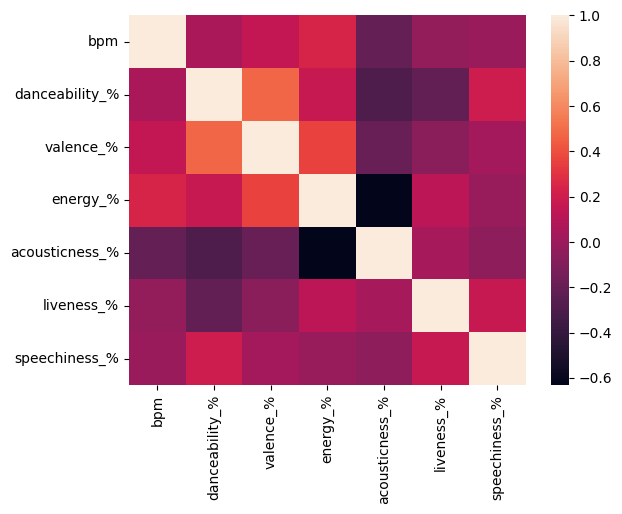

In [599]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [600]:
df = df.astype({'danceability_%':'object'})
df = df.astype({'valence_%':'object'})
df = df.astype({'energy_%':'object'})
df = df.astype({'bpm':'object'})

In [601]:
df.drop(['track_name'], axis=1, inplace=True)

In [602]:
df.drop(['artist(s)_name'], axis=1, inplace=True)

In [603]:
df.drop(['valence_%'], axis=1, inplace=True)

In [604]:
features=['bpm', 'energy_%', 'danceability_%']
dummies=pd.get_dummies(df[features])
merged=pd.concat([df,dummies],axis=1)
final=merged.drop(['bpm', 'energy_%', 'danceability_%'], axis=1)
df=final
df.head()

,acousticness_%,liveness_%,speechiness_%,popularity,bpm_0.0,bpm_38.569,bpm_42.933,bpm_43.598,bpm_47.788,bpm_48.683,...,danceability_%_90.0,danceability_%_90.10000000000001,danceability_%_90.2,danceability_%_90.3,danceability_%_90.4,danceability_%_90.5,danceability_%_90.60000000000001,danceability_%_90.8,danceability_%_90.9,danceability_%_100.0
0,20.0,20.0,10.0,popular,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,50.0,10.0,10.0,popular,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30.0,10.0,40.0,popular,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,30.0,30.0,10.0,popular,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10.0,10.0,10.0,popular,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [605]:
# dont forget to define your X and y
X= df.drop(['popularity'],axis=1)
y=df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [606]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [607]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [608]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.944
Random Forest: f1-score=0.928
